## Curvilinear grid Great Circle Interpolation of tracer points

Using [xmitgcm](https://xmitgcm.readthedocs.io/en/latest) to load `tutorial_global_oce_latlon` grid and interpolate from grid to specified lat lons (in a linearly spaced vector to start). 

Goal: save ssp and bathymetry along specified lat lons

In [1]:
import sandbox as sb
import numpy as np
import xarray as xr
import xmitgcm

# Plotting
import matplotlib.pyplot as plt

In [2]:
data_dir = '/home/ivana/tutorial_global_oce_latlon/run'
grid_dir = data_dir

In [3]:
ds = xmitgcm.open_mdsdataset(data_dir, 
                             prefix=['ssp', 'T'], 
                             iters=[20])
ds = ds.squeeze()

In [4]:
ds

<xarray.Dataset>
Dimensions:   (XC: 90, XG: 90, YC: 40, YG: 40, Z: 15, Zl: 15, Zp1: 16, Zu: 15)
Coordinates:
    iter      int64 20
    time      timedelta64[ns] 00:00:20
  * XC        (XC) >f4 2.0 6.0 10.0 14.0 18.0 ... 342.0 346.0 350.0 354.0 358.0
  * YC        (YC) >f4 -78.0 -74.0 -70.0 -66.0 -62.0 ... 66.0 70.0 74.0 78.0
  * XG        (XG) >f4 0.0 4.0 8.0 12.0 16.0 ... 340.0 344.0 348.0 352.0 356.0
  * YG        (YG) >f4 -80.0 -76.0 -72.0 -68.0 -64.0 ... 64.0 68.0 72.0 76.0
  * Z         (Z) >f4 -25.0 -85.0 -170.0 -290.0 ... -3575.0 -4190.0 -4855.0
  * Zp1       (Zp1) >f4 0.0 -50.0 -120.0 -220.0 ... -3870.0 -4510.0 -5200.0
  * Zu        (Zu) >f4 -50.0 -120.0 -220.0 -360.0 ... -3870.0 -4510.0 -5200.0
  * Zl        (Zl) >f4 0.0 -50.0 -120.0 -220.0 ... -3280.0 -3870.0 -4510.0
    rA        (YC, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dxG       (YG, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dyG       (YC, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    Depth     (YC, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    rAz       (YG, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dxC       (YC, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dyC       (YG, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    rAw       (YC, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    rAs       (YG, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    drC       (Zp1) >f4 25.0 60.0 85.0 120.0 165.0 ... 565.0 615.0 665.0 345.0
    drF       (Z) >f4 50.0 70.0 100.0 140.0 190.0 ... 540.0 590.0 640.0 690.0
    PHrefC    (Z) >f4 245.25 833.85 1667.7 2844.9 ... 35070.75 41103.9 47627.55
    PHrefF    (Zp1) >f4 0.0 490.5 1177.2 2158.2 ... 37964.7 44243.1 51012.0
    hFacC     (Z, YC, XC) >f4 dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    hFacW     (Z, YC, XG) >f4 dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    hFacS     (Z, YG, XC) >f4 dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    maskC     (Z, YC, XC) bool dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    maskW     (Z, YC, XG) bool dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    maskS     (Z, YG, XC) bool dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    rhoRef    (Z) >f4 1024.8727 1025.1355 1025.5072 ... 1042.302 1044.9393
    dxF       (YC, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dyF       (YC, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dxV       (YG, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dyU       (YG, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
Data variables:
    T         (Z, YC, XC) >f4 dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    ihop_ssp  (Z, YC, XC) >f4 dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir=None, iters=[2...

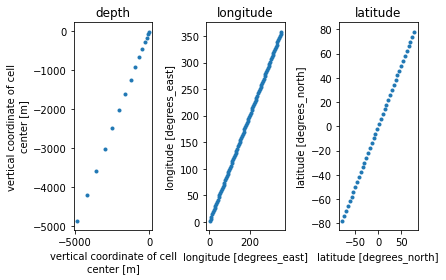

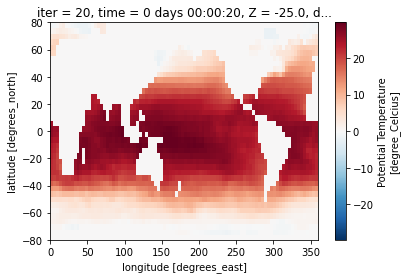

In [5]:
lineVars = ['Z', 'XC', 'YC']; i = 0
fig, axes = plt.subplots(ncols=3)
for var in lineVars: 
    ds[var].plot( ax=axes[i], lw=0, marker='.')
    axes[i].title.set_text(ds[var].attrs['standard_name'])
    i = i+1
plt.tight_layout()
plt.show()

ds.T.isel(Z=0).plot()
plt.show()

# example weight calc

assume we want weights at the point $[290.5, 35.1]^\circ$. We find the indices of the tracer point southwest of the point, and calc the normalized distances to the point, $s_{lon}, s_{lat}$

It's cheapest to store only 2 values, and we found for this grid the higher latitudes did not increase error in the linear interpolation of $s_{lon}$. Surprisingly, the $s_{lon}$ difference reduced to $\mathcal{O}(1e-7)$ at $78^\circ N$. 

In [6]:
#   XC        YC
pt =[290.5,   35.1]
ds = ds.isel(Z=0)

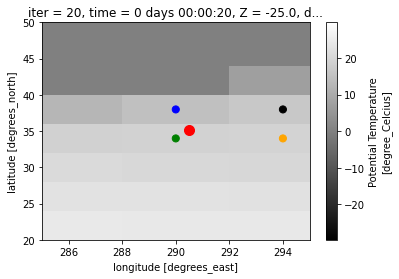

In [7]:
ds.T.plot(xlim=[285, 295], ylim=[20,50], cmap='gray')
plt.scatter(x=pt[0],y=pt[1],c='red', s=100)
plt.scatter(x=[ds.XC[72], ds.XC[72], ds.XC[73], ds.XC[73]],
            y=[ds.YC[28], ds.YC[29], ds.YC[28], ds.YC[29]],
            c=['green','blue', 'orange', 'black'],s=50)
plt.show()

In [8]:
print(ds.XC[72].values, ds.YC[28].values )
print(ds.XC[73].values, ds.YC[29].values )

290.0 34.0
294.0 38.0


In [9]:
s_lon = sb.gcDistance(ds.YC[28], ds.XC[72], ds.YC[28], pt[0]) / \
        sb.gcDistance(ds.YC[28], ds.XC[72], ds.YC[28], ds.XC[73])
s_lon_top = sb.gcDistance(ds.YC[29], ds.XC[72], ds.YC[29], pt[0]) / \
        sb.gcDistance(ds.YC[29], ds.XC[72], ds.YC[29], ds.XC[73])

s_lat = sb.gcDistance(ds.YC[28], ds.XC[72], pt[1], ds.XC[72]) / \
        sb.gcDistance(ds.YC[28], ds.XC[72], ds.YC[29], ds.XC[72])

print(np.abs((s_lon - s_lon_top).values))

1.6581873240051337e-06


### Bi-curvilinear interpolation: Written like FORTRAN

remember Python is 0 indexed and FORTRAN is 1 indexed!

In [38]:
#Step 1: find GRID parent point indices
i=-1
for lon in ds.XC.values:
    if lon < pt[0]:
        i = i+1
if ds.XC[i+1] < pt[0]:
    print('error: point is not contained by tracer points in lon')
        
j=-1
for lat in ds.YC.values:
    if lat < pt[1]:
        j = j+1
if ds.YC[j+1] < pt[1]:
    print('error: point is not contained by tracer points in lat')
        
#Step 2: Find GC distances [m] between tracer points 
#         and to point of interest
dlat = sb.gcDistance(ds.YC[j], ds.XC[i], ds.YC[j+1], ds.XC[i])
dlon = sb.gcDistance(ds.YC[j], ds.XC[i], ds.YC[j],   ds.XC[i+1])

slat = sb.gcDistance(ds.YC[j], ds.XC[i], 36,    ds.XC[i])
slon = sb.gcDistance(ds.YC[j], ds.XC[i], ds.YC[j], 292.)

#you now have to grid weights to the pt!
wlat = slat/dlat
wlon = slon/dlon

In [40]:
#Step 3: Calc dc along XC[i] between tracer points
dc = ds.ihop_ssp.sel(XC=ds.XC[i], YC=ds.YC[j+1])  - \
     ds.ihop_ssp.sel(XC=ds.XC[i], YC=ds.YC[j])

#Step 4: Calc intermediate first linear interp on curvi in lat
cy  = ds.ihop_ssp.sel(XC=ds.XC[i],   YC=ds.YC[j]) + dc*wlat
cy2 = ds.ihop_ssp.sel(XC=ds.XC[i+1], YC=ds.YC[j]) + dc*wlat

#Step 5: Calc final interp on curvilinear grid in lon
c   = (1-wlon)*cy + wlon*cy2

In [41]:
print (cy.values, '\t', cy2.values, '\n\n')
print( ds.ihop_ssp.sel(XC=ds.XC[i],   YC=ds.YC[j+1]).values, '\t',
       ds.ihop_ssp.sel(XC=ds.XC[i+1], YC=ds.YC[j+1]).values, '\n',
       ds.ihop_ssp.sel(XC=ds.XC[i],   YC=ds.YC[j]).values, '\t',
       ds.ihop_ssp.sel(XC=ds.XC[i+1], YC=ds.YC[j]).values )

1517.132 	 1517.4487 


1510.252 	 1516.7739 
 1524.012 	 1524.3287


In [42]:
print(c.values)

1517.2903


In [43]:
dcx = ds.ihop_ssp.sel(XC=ds.XC[i+1], YC=ds.YC[j])  - \
      ds.ihop_ssp.sel(XC=ds.XC[i],   YC=ds.YC[j])
cx  = ds.ihop_ssp.sel(XC=ds.XC[i],   YC=ds.YC[j])   + dcx*wlon
cx2 = ds.ihop_ssp.sel(XC=ds.XC[i],   YC=ds.YC[j+1]) + dcx*wlon

c2 = (1-wlat)*cx + wlat*cx2

In [45]:
print(c2.values-c.values)

0.00012207031
